CHAPTER 10 언어 모델을 위한 신경망   
10-2 트랜스포머로 상품 설명 요약하기 

In [ ]:
# sshleifer/distilbart-cnn-12-6 모델 불러오기
from tensorflow import keras
import tf_keras
import torch
from transformers import pipeline
pipe = pipeline(task='summarization', model='sshleifer/distilbart-cnn-12-6', device=0)

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

Device set to use cuda:0


In [ ]:
# 텍스트 요약
sample_text ="""Vincent Willem van Gogh was a Dutch Post-Impressionist painter who is among the most famous and influential figures in the history of Western art. In just over a decade, he created approximately 2100 artworks, including around 860 oil paintings, most of them in the last two years of his life. His oeuvre includes landscapes, still lifes, portraits, and self-portraits, most of which are characterised by bold colours and dramatic brushwork that contributed to the rise of expressionism in modern art. Van Gogh's work was beginning to gain critical attention before he died from a self-inflicted gunshot at age 37. During his lifetime, only one of Van Gogh's paintings, The Red Vineyard, was sold."""
pipe(sample_text)

[{'summary_text': " Vincent Willem van Gogh was a Dutch Post-Impressionist painter . His oeuvre includes landscapes, still lifes, portraits and self-portraits . Van Gogh's work was beginning to gain critical attention before he died from a self-inflicted gunshot at age 37 ."}]

In [ ]:
# EbanLee/kobart-summary-v3 모델 불러오기
kobart = pipeline(task='summarization', 
                   model='EbanLee/kobart-summary-v3', device=0)

config.json: 0.00B [00:00, ?B/s]

You passed `num_labels=3` which is incompatible to the `id2label` map of length `2`.
You passed `num_labels=3` which is incompatible to the `id2label` map of length `2`.


model.safetensors:   0%|          | 0.00/496M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/191 [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/692 [00:00<?, ?B/s]

Device set to use cuda:0


In [ ]:
# 텍스트 요약
ko_text = """
하나, ‘입문자 맞춤형 7단계 구성’을 따라가며 체계적으로 반복하는 탄탄한 학습 설계!
이 책은 데이터 분석의 핵심 내용을 7단계에 걸쳐 반복 학습하면서 자연스럽게 머릿속에 기억되도록 구성했습니다. [핵심 키워드]와 [시작하기 전에]에서 각 절의 주제에 대한 대표 개념을 워밍업하고, 이론과 실습을 거쳐 마무리에서는 [핵심 포인트]와 [확인 문제]로 한번에 복습합니다. ‘혼자 공부할 수 있는’ 커리큘럼을 그대로 믿고 끝까지 따라가다 보면 데이터 분석 공부가 난생 처음인 입문자도 무리 없이 책을 끝까지 마칠 수 있습니다!
둘, 실제로 일어날 법한 흥미로운 스토리에 담긴 문제를 직접 해결하며 익히는 ‘진짜’ 데이터 분석!
현장감 넘치는 스토리를 통해 데이터를 다루는 방법을 알려 주어 ‘파이썬’과 ‘데이터’가 낯설어도 몰입감 있는 학습을 할 수 있도록 구성했습니다. 이 책에서는 API와 웹 스크래핑을 통해 실제 도서관 데이터와 온라인 서점 웹사이트에서 데이터를 가져오는 등 내 주변에 있는 데이터를 직접 수집할 수 있는 방법을 가이드합니다. 또한 판다스, 넘파이, 맷플롯립 등 데이터 분석에 유용한 각종 파이썬 라이브러리를 활용해 보며 코딩 감각을 익히고, 핵심 통계 지식으로 기본기를 탄탄하게 다질 수 있습니다. 마지막에는 분석을 바탕으로 미래를 예측하는 머신러닝까지 맛볼 수 있어 데이터 분석의 처음부터 끝까지 제대로 배울 수 있습니다.
셋, ‘혼공’의 힘을 실어줄 동영상 강의와 혼공 학습 사이트 지원!
책으로만 학습하기엔 여전히 어려운 입문자를 위해 저자 직강 동영상도 지원합니다. 또한 학습을 하며 궁금한 사항은 언제든지 저자에게 질문할 수 있도록 학습 사이트를 제공합니다. 저자가 질문 하나하나에 직접 답변을 달아 주는 것은 물론, 관련 최신 기술과 정보도 얻을 수 있습니다. 게다가 혼자 공부하고 싶지만 정작 혼자서는 자신 없는 사람들을 위해 혼공 학습단을 운영합니다. 혼공 학습단과 함께하면 마지막까지 포기하지 않고 완주할 수 있을 것입니다.
▶ https://hongong.hanbit.co.kr
▶ https://github.com/rickiepark/hg-da
넷, 언제 어디서든 가볍게 볼 수 있는 혼공 필수 [용어 노트] 제공!
꼭 기억해야 할 핵심 개념과 용어만 따로 정리한 [용어 노트]를 제공합니다. 처음 공부하는 사람들이 프로그래밍을 어려워하는 이유는 낯선 용어 때문입니다. 그러나 어려운 것이 아니라 익숙하지 않아서 헷갈리는 것이므로, 용어나 개념이 잘 생각나지 않을 때는 언제든 부담 없이 [용어 노트]를 펼쳐 보세요. 제시된 용어 외에도 새로운 용어를 추가하면서 자신만의 용어 노트를 완성해가는 과정도 또 다른 재미가 될 것입니다.
"""
kobart(ko_text)

[{'summary_text': '이 책은 데이터 분석의 핵심 내용을 7단계에 걸쳐 반복 학습하면서 머릿속에 기억되도록 구성했습니다. 독자 공부할 수 있는 커리큘럼을 그대로 믿고 끝까지 따라가다 보면 데이터 분석 공부가 난생 처음인 입문자도 무리 없이 책을 끝까지 마칠 수 있습니다. 현장감 넘치는 스토리를 통해 데이터를 다루는 방법을 알려 주어 몰입감 있는 학습을 할 수 있도록 구성했습니다. 저자가 질문 하나하나에 직접 답변을 달아 주는 것은 물론, 최신 기술과 정보도 얻을 수 있습니다. 혼공 학습단과 함께하면 마지막까지 포기하지 않고 완주할 수 있을 것입니다. '}]

[토큰화]  
: 텍스트를 토큰(token)이라는 단위로 분할하는 과정 
> 부분단어 토큰화 : BPE, 워드피스, 유니그램, 센텐스피스 

[토크나이저]   
: 토큰화를 수행하는 모델
- 훈련 데이터로부터 최적의 어휘 사전을 학습하는 모델에 가까우
- 토큰의 임베딩 벡터는 토크나이저가 아닌 LLM 모델의 임베딩 층에 있음  

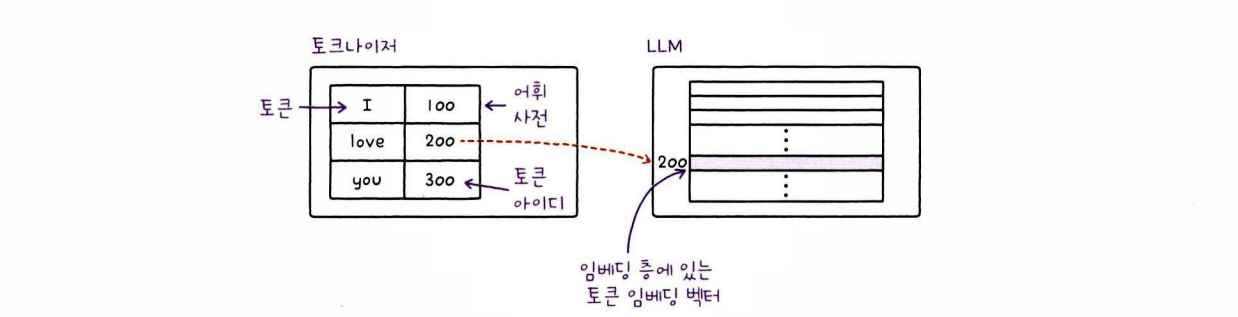

[BPE]  
각 단어를 문자 단위로 분해해 어휘 사전에 추가 -> 가장 많이 등장하는 순서대로 문자 쌍을 찾아 병합  
-> 합쳐진 부분단어를 어휘 사전에 추가 -> 사전에 정의된 어휘 사전 크기에 도달할 때까지 계속 진행    

[바이트 수준의 BPE 알고리즘]  
텍스트를 바이트 스트림으로 인식하고 자주 등장하는 바이트 쌍을 어휘사전에 추가  



In [ ]:
# kobart 모델의 어휘사전 크기 확인
print(kobart.tokenizer.vocab_size) # tokenizer 이용

print(len(kobart.tokenizer)) # len() 함수 이용

vocab = kobart.tokenizer.vocab # vocab 속성 이용
print(len(vocab))

30000
30000
30000


In [ ]:
# 토큰 확인
list(vocab.items())[:10]

[('樺', 4831),
 ('정책을', 21802),
 ('欌', 4875),
 ('羗', 6675),
 ('▁지자', 17677),
 ('쾅', 12994),
 ('쭃', 12525),
 ('郊', 8049),
 ('▁리조', 27539),
 ('싼', 11492)]

In [27]:
# 토크나이저 객체가 제공하는 tokenize() 메서드로 셈플 텍스트 토큰으로 나누기
tokens = kobart.tokenizer.tokenize('혼자 만들면서 공부하는 딥러닝')
print(tokens)

['▁혼자', '▁만들', '면서', '▁공부', '하는', '▁', '딥', '러', '닝']


In [28]:
# 토큰 아이디 찾기
kobart.tokenizer.convert_tokens_to_ids(tokens)

[16814, 14397, 14125, 16962, 14049, 1700, 10021, 10277, 9747]

In [29]:
# encode() 메서드로 문자열을 토큰 아이디 리스트로 만들기
token_ids = kobart.tokenizer.encode('혼자 만들면서 공부하는 딥러닝')
print(token_ids)

[0, 16814, 14397, 14125, 16962, 14049, 1700, 10021, 10277, 9747, 1]


In [30]:
# convert_ids_to_tokens() 으로 토큰 아이디를 토큰으로 바꾸기
tokens = kobart.tokenizer.convert_ids_to_tokens(token_ids)
print(tokens)

['<s>', '▁혼자', '▁만들', '면서', '▁공부', '하는', '▁', '딥', '러', '닝', '</s>']


In [31]:
# decode()를 이용해 토큰 리스트를 원래 문자열로 복원
kobart.tokenizer.decode(token_ids)

'<s> 혼자 만들면서 공부하는 딥러닝</s>'

[워드피스]  
BPE와 유사하나 BPE는 단순히 가장 많이 등장하는 부분단어를 선택 / 워드피스는 부분단어를 구성하는 개별 토큰의 빈도도 고려  
- 대표적 LLM : 인코더 기반 모델 BERT  

[유니그램]  
초기에 매우 큰 어휘 사전을 만든 다음 사전 지정 어휘 사전 크기에 도달할 때 까지 점진적으로 토큰을 제거  
- 전체 손실을 가장 적게 증가시키는 토큰을 하나씩 삭제  

[손실=음의 로그 확률=음의 로그 기능도]    
각 토큰의 등장 확률을 곱한 것에 음수를 취한 값에 로그를 씌운 값  

[센턴스피스]  
텍스트를 공백 등의 기준으로 나누는 사전 토큰화를 사용하지 않는 방법  
- 공백을 문자의 하나로 간주  